# Problem 6.2.1
The following is Jupyter notebook showing how to use Gradient Descent with a for loop to minimize $2W_0^2+W_1^2$. It is taken from the file: [IntroML/Examples/Chapter3/Optimization.ipynb](https://github.com/satishchandrareddy/IntroML/blob/master/Examples/Chapter3/Optimization.ipynb). Create analogous Jupyter notebook examples for the Momentum, RmsProp and Adam optimizers. Minimize the function with [2,2] as the initial guess point using 30 epochs.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Loss and Gradient Functions
Define function for loss $L(W_0, W_1) = 2W_0^2 + W_1^2$ and gradient $\nabla_WL=[4W_0,2W_1]$.

In [4]:
# define loss and gradient functions
def loss(W):
    return 2*W[0]**2 + W[1]**2

def grad(W):
    return np.array([4*W[0],2*W[1]])

## Momentum with  n=30 Epochs
### Update Rule:
$Update_{epoch=i}=-\alpha v_{epoch=i}$

where, 

+ $v_{epoch=i} = \beta v_{epoch=i-1} + \nabla_WL_{epoch=i-1}, \quad v_{epoch=0} = 0$

After 30 epochs
W: [0.00094359 0.05892871]
Loss: 0.0034743732786460643


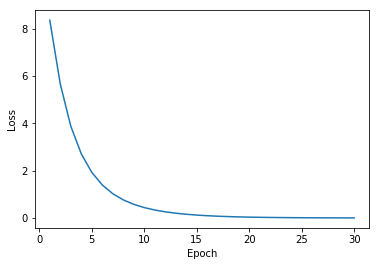

In [53]:
# initialization
W = np.array([2,2])
alpha = 0.05
beta = 0.09
v = 0
nepoch = 30

# iteration
loss_history = []
for epoch in range(nepoch):
    gradW = grad(W)
    v = beta*v + gradW
    W = W - alpha*v
    loss_history.append(loss(W))
print("After {} epochs".format(nepoch))
print("W: {}".format(W))
print("Loss: {}".format(loss_history[-1]))

plt.figure()
epoch_list = list(range(1,nepoch+1))
plt.plot(epoch_list,loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## RmsProp with  n=30 Epochs
### Update Rule:
$Update_{epoch=i}=-\frac{\alpha}{\sqrt{v_{epoch=i}} + \epsilon}\nabla_WL_{epoch=i-1}$

where, 

+ $v_{epoch=i} = \beta v_{epoch=i-1} + (1-\beta) \nabla_WL^2_{epoch=i-1}, \quad v_{epoch=0} = 0$

After 30 epochs
W: [0.0116881  0.01168855]
Loss: 0.00040984545471172215


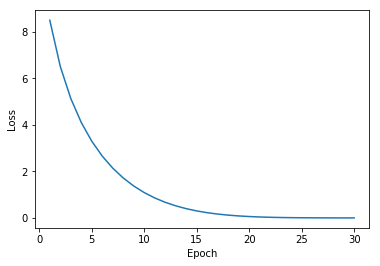

In [54]:
# initialization
W = np.array([2,2])
alpha = 0.1
beta = 0.9
v = 0
eps = 1e-5
nepoch = 30

# iteration
loss_history = []
for epoch in range(nepoch):
    gradW = grad(W)
    grad2W = np.square(gradW)
    v = beta*v + (1-beta)*grad2W
    W = W - alpha*gradW/(np.sqrt(v)+eps)
    loss_history.append(loss(W))
print("After {} epochs".format(nepoch))
print("W: {}".format(W))
print("Loss: {}".format(loss_history[-1]))

plt.figure()
epoch_list = list(range(1,nepoch+1))
plt.plot(epoch_list,loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Adam with  n=30 Epochs
### Update Rule:
$Update_{epoch=i}=-\frac{\alpha}{\sqrt{v_{epoch=i}} + \epsilon}m_{epoch=i}$

where, 

+ $m_{epoch=i} = \beta_1m_{epoch=i-1} + (1-\beta_1) \nabla_WL_{epoch=i-1}, \quad m_{epoch=0} = 0$

+ $v_{epoch=i} = \beta_2v_{epoch=i-1} + (1-\beta_2) \nabla_WL^2_{epoch=i-1}, \quad v_{epoch=0} = 0$

After 30 epochs
W: [0.15974549 0.15975998]
Loss: 0.07656049668273983


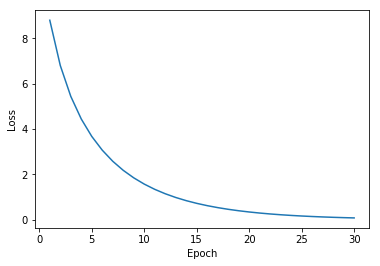

In [64]:
# initialization
W = np.array([2,2])
alpha = 0.01
beta1 = 0.09
beta2 = 0.999
m = 0
v = 0
eps = 1e-5
nepoch = 30

# iteration
loss_history = []
for epoch in range(nepoch):
    gradW = grad(W)
    grad2W = np.square(gradW)
    m = beta1*m + (1-beta1)*gradW
    v = beta2*v + (1-beta2)*grad2W 
    W = W - alpha*m/(np.sqrt(v)+eps)
    loss_history.append(loss(W))
print("After {} epochs".format(nepoch))
print("W: {}".format(W))
print("Loss: {}".format(loss_history[-1]))

plt.figure()
epoch_list = list(range(1,nepoch+1))
plt.plot(epoch_list,loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()